# Pandas 2: Visualizations and analysis of 5 different datasets
    Bailey Smith
    October 19 2017

In [1]:
import numpy as np
import pandas as pd
from pydataset import data
from matplotlib import pyplot as plt

%matplotlib inline

In [190]:
plt.style.use("seaborn")

# Trees Data Set

#### Description: Data measured from 31 felled black cherry trees
    Girth in inches (which I convert to feet)
    Height in feet
    Volume in cubic feet

#### Source:
Ryan, T. A., Joiner, B. L. and Ryan, B. F. (1976) _The Minitab Student
Handbook_. Duxbury Press.

In [119]:
trees = data("trees")
g = lambda x: x/12
trees['Girth'] = trees['Girth'].apply(g)
trees.head()

,Girth,Height,Volume
1,0.691667,70,10.3
2,0.716667,65,10.3
3,0.733333,63,10.2
4,0.875000,72,16.4
5,0.891667,81,18.8


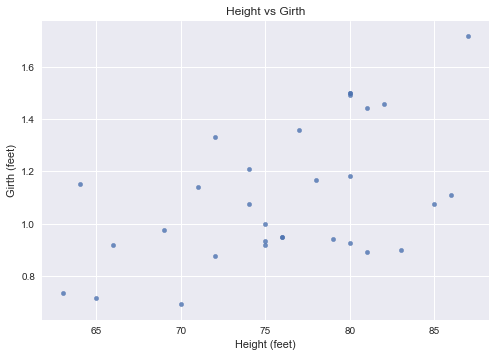

In [175]:
trees.plot(kind="scatter", x="Height", y="Girth", alpha=.8)
plt.title('Height vs Girth')
plt.xlabel('Height (feet)')
plt.ylabel('Girth (feet)')

From this graph we can see that there is a subtle trend that taller black cherry trees have a larger girth while the shorter trees generally have a smaller girth.

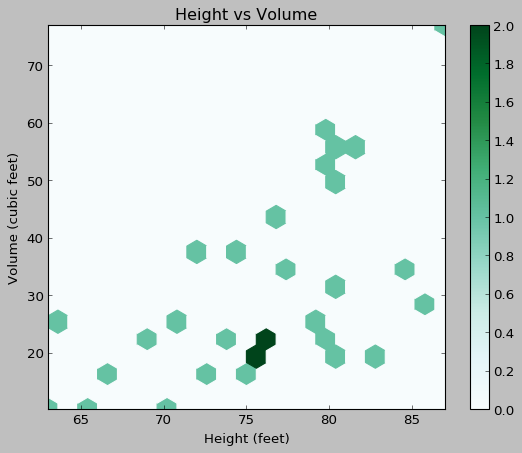

In [178]:
plt.style.use('_classic_test')
trees.plot(kind="Hexbin", x="Height", y="Volume", gridsize=20)
plt.title('Height vs Volume')
plt.xlabel('Height (feet)')
plt.ylabel('Volume (cubic feet)')

From this graph we can see that while some black cherry trees are the same height, their volume can differ quite a bit. At the same time black cherry trees with more volume do tend to be taller than those with less volume

# Breast Feeding Data Set

#### Description: Breast feeding information for different moms
    duration: Duration of breast feeding, weeks
    delta: Indicator of completed breast feeding (1=yes, 0=no)
    race: Race of mother (1=white, 2=black, 3=other)
    poverty: Mother in poverty (1=yes, 0=no)
    smoke: Mother smoked at birth of child (1=yes, 0=no)
    alcohol: Mother used alcohol at birth of child (1=yes, 0=no)
    agemth: Age of mother at birth of child
    ybirth: Year of birth
    yschool: Education level of mother (years of school)
    pc3mth: Prenatal care after 3rd month (1=yes, 0=no)

#### Source:
Klein and Moeschberger (1997) _Survival Analysis Techniques for Censored and
truncated data_, Springer. _National Longitudinal Survey of Youth Handbook_
The Ohio State University, 1995.

In [198]:
plt.style.use('seaborn')

In [199]:
bfeed = data("bfeed")
bfeed.head()

,duration,delta,race,poverty,smoke,alcohol,agemth,ybirth,yschool,pc3mth
1,16,1,1,0,0,1,24,82,14,0
2,1,1,1,0,1,0,26,85,12,0
3,4,0,1,0,0,0,25,85,12,0
4,3,1,1,0,1,1,21,85,9,0
5,36,1,1,0,1,0,22,82,12,0


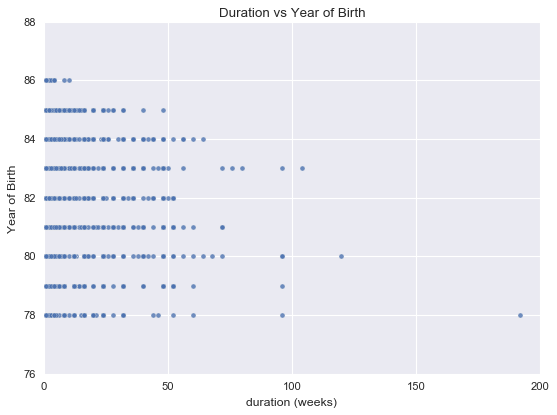

In [204]:
bfeed.plot(kind="scatter", x="duration", y="ybirth", alpha=.8)
plt.xlabel('duration (weeks)')
plt.ylabel('Year of Birth')
plt.xlim(0,200)
plt.title('Duration vs Year of Birth')

From this graph we observe the duration of breast feeding from different mothers from different years of birth. We notice that for 1986 the duration of breast feeding remained much lower than for other years. We also notice that it is most commonn for the duration of breastfeeding to stop before 50 weeks.

(0, 120)

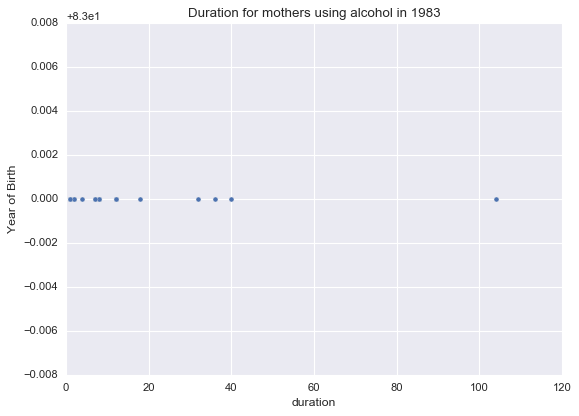

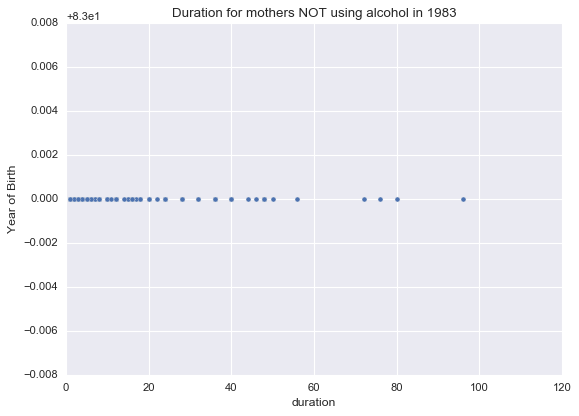

In [206]:
bfeed[(bfeed['alcohol'] == 1) & (bfeed['ybirth'] == 83)].plot(x='duration',y='ybirth',kind='scatter')
plt.title('Duration for mothers using alcohol in 1983')
plt.xlim(0,120)
plt.ylabel('Year of Birth')
bfeed[(bfeed['alcohol'] == 0) & (bfeed['ybirth'] == 83)].plot(x='duration',y='ybirth',kind='scatter')
plt.title('Duration for mothers NOT using alcohol in 1983')
plt.ylabel('Year of Birth')
plt.xlim(0,120)

From these two graphs we observe the durations of breastfeeding from mothers who used alcohol at the time of birth and from mothers who did not. For mothers who did use alcohol, it was more rare for the breastfeeding to last longer than 40 weeks. For the mothers who did not use alcohol, there was a higher percentage of those who continued breastfeeding after 40 weeks than for the mothers who did use alcohol

# Road Data Set

#### Description: Road accident deaths in selected US states
    state
    deaths: number of deaths
    drivers: number of drivers (in 10,000s)
    popden: population density in people per square mile
    rural: length of rural roads, in 1000s of miles
    temp: average daily maximum temperature in January
    fuel: fuel consumption in 10,000,000 US gallons per year
    
#### Source:
Imperial College, London M.Sc. exercise

In [115]:
road = data("road")
road.head()

,deaths,drivers,popden,rural,temp,fuel
Alabama,968,158,64.0,66.0,62,119.0
Alaska,43,11,0.4,5.9,30,6.2
Arizona,588,91,12.0,33.0,64,65.0
Arkanas,640,92,34.0,73.0,51,74.0
Calif,4743,952,100.0,118.0,65,105.0


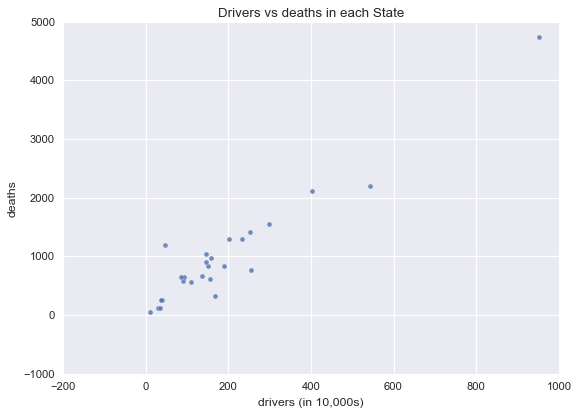

In [207]:
road.plot(kind="scatter", x="drivers", y="deaths", alpha=.8)
plt.xlabel("drivers (in 10,000s)")
plt.title('Drivers vs deaths in each State')

This graph shows us the ratio of number of divers versus deaths that occured in different states. We can see that the number of deaths increases as the number of drivers increases.

(0, 12800)

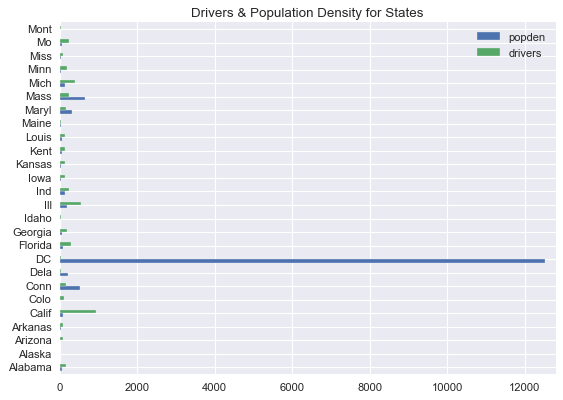

In [212]:
road.loc['Alabama':][["popden","drivers"]].plot(kind="barh")
plt.title('Drivers & Population Density for States')
plt.xlim(0,12800)

This graph shows us the number of drivers and the population density for different states. We can see that There are states such as Massachusettes, Maryland, Connecticut, and DC where the population density is high while the number of drivers is small. For DC it is interesting that the population density is drastically higher than that of other states and the number of drivers is significantly lower than that of other states.

# Sleep Study Data Set

#### Description: The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

    Reaction: Average reaction time (ms)
    Days: Number of days of sleep deprivation
    Subject: Subject number on which the observation was made.


#### Source:
These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, Michael B. Russo and Thomas J. Balkin (2003)
Patterns of performance degradation and restoration during sleep restriction
and subsequent recovery: a sleep dose-response study. _Journal of Sleep
Research_ **12**, 1–12.

In [113]:
sleepstudy = data("sleepstudy")
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


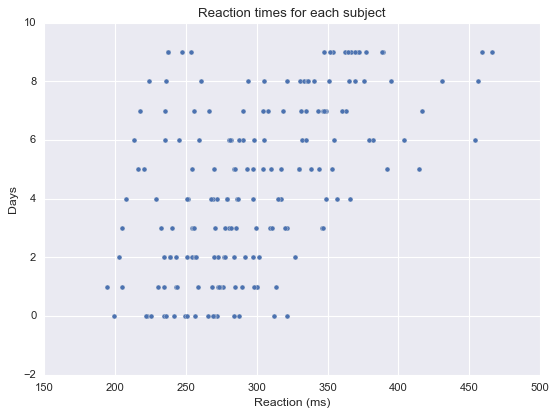

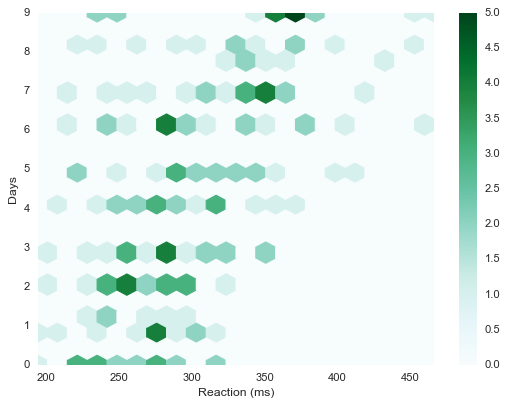

In [220]:
sleepstudy[sleepstudy['Days'] >= 0][['Reaction', 'Days']].plot(x='Reaction',y='Days',kind="scatter")
plt.title('Reaction times for each subject')
plt.xlabel('Reaction (ms)')

sleepstudy.plot(kind="Hexbin", x="Reaction", y="Days", gridsize=20)
plt.xlabel('Reaction (ms)')

These graphs show two different visualizations for reaction time for each day of the study. We can see that reaction times are spread for all the subjects but there is a slight trend that with more days of sleep deprevation reaction times increase

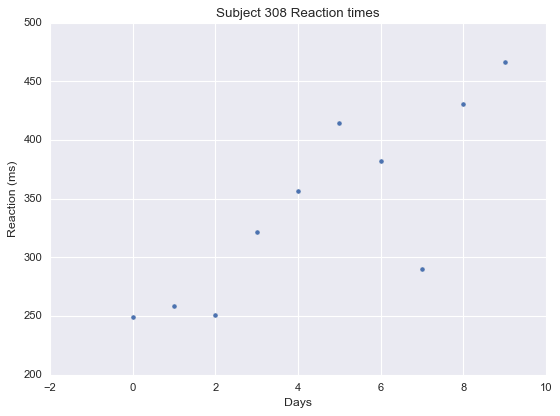

In [216]:
sleepstudy[sleepstudy['Subject'] ==  308][['Reaction', 'Days']].plot(x='Days',y='Reaction',kind='scatter')
plt.ylabel('Reaction (ms)')
plt.title('Subject 308 Reaction times')

This graph represents the reaction times over 10 days for subject 308. We can see that his reaction time was relatively the same afer 2 days but increased over days 3 through 6. Then on day 7 subject 308 had better reaction time but still not as quick as before being sleep deprived. Then days 8 and 9 his reaction time was the slowest.

# Arbuthnot Data Set

#### Description: Arbuthnot's data on male and female birth ratios in London from 1629-1710.
    Year: a numeric vector, 1629-1710
    Males: a numeric vector, number of male christenings
    Females: a numeric vector, number of female christenings
    Plague: a numeric vector, number of deaths from plague
    Mortality: a numeric vector, total mortality
    Ratio: a numeric vector, ratio of Males/Females
    Total: a numeric vector, total christenings in London (000s)

#### Source:

Arbuthnot, John (1710). "An argument for Devine Providence, taken from the
constant Regularity observ'd in the Births of both Sexes," _Philosophical
transactions_, 27, 186-190. Published in 1711.

In [144]:
Arbuthnot = data("Arbuthnot")
Arbuthnot.head()

,Year,Males,Females,Plague,Mortality,Ratio,Total
1,1629,5218,4683,0,8771,1.114243,9.901
2,1630,4858,4457,1317,10554,1.089971,9.315
3,1631,4422,4102,274,8562,1.078011,8.524
4,1632,4994,4590,8,9535,1.088017,9.584
5,1633,5158,4839,0,8393,1.065923,9.997


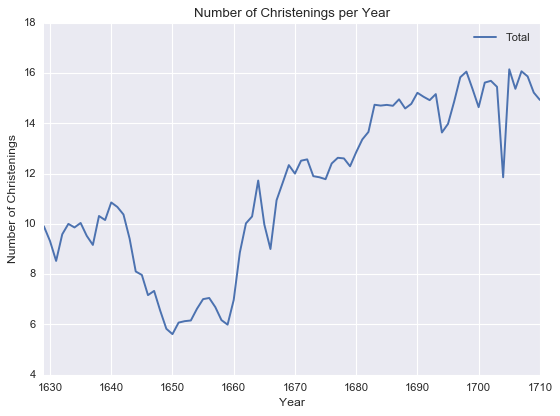

In [219]:
Arbuthnot.plot(x='Year', y='Total')
plt.title('Number of Christenings per Year')
plt.ylabel('Number of Christenings')

From this graph we can see that for some reason the number of christenings dropped between 1640 and 1660. Other than that and a sudden drop in 1704 the number of christenings increases steadily.

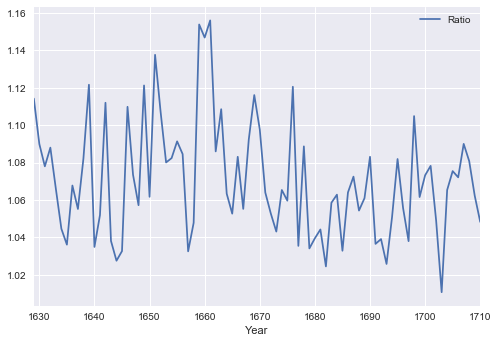

In [148]:
Arbuthnot.plot(x='Year', y='Ratio')
plt.title('Ratio of Males to Females by year')
plt.ylabel('Number of Christenings')

The ratio of Males to Females seems to fluctuate drastically. However there does seem to be a sublte movement towards a 1:1 ratio.